In [6]:
import pandas as pd
import numpy as np

# load data
train_embeddings = np.load('embeddings-data/train-embeddings.npy')
test_embeddings = np.load('embeddings-data/test-embeddings.npy')
valid_embeddings = np.load('embeddings-data/valid-embeddings.npy')

train_tfidf = np.load('tfidf-data/train-tfidf.npy')
test_tfidf = np.load('tfidf-data/test-tfidf.npy')
valid_tfidf = np.load('tfidf-data/valid-tfidf.npy')

train_df = pd.read_csv('raw-data/train.csv')
test_df = pd.read_csv('raw-data/test.csv')
valid_df = pd.read_csv('raw-data/valid.csv')

In [7]:
# Preprocessing
# Fill NaN value in 'requirements_and_role' column with an empty string
train_df['requirements_and_role'].fillna('', inplace=True)

# Separate labeled and unlabeled data
labeled_train_df = train_df.iloc[:8000]
unlabeled_train_df = train_df.iloc[8000:]

# Separate the features and labels
X_labeled_train_embeddings = train_embeddings[:8000]
X_labeled_train_tfidf = train_tfidf[:8000]
X_unlabeled_train_embeddings = train_embeddings[8000:]
X_unlabeled_train_tfidf = train_tfidf[8000:]

X_labeled_train_combined = np.concatenate((X_labeled_train_embeddings, X_labeled_train_tfidf), axis=1)
X_unlabeled_train_combined = np.concatenate((X_unlabeled_train_embeddings, X_unlabeled_train_tfidf), axis=1)

valid_combined = np.concatenate((valid_embeddings, valid_tfidf), axis=1)

y_train_salary_bin = labeled_train_df['salary_bin'].values
y_valid_salary_bin = valid_df['salary_bin'].values

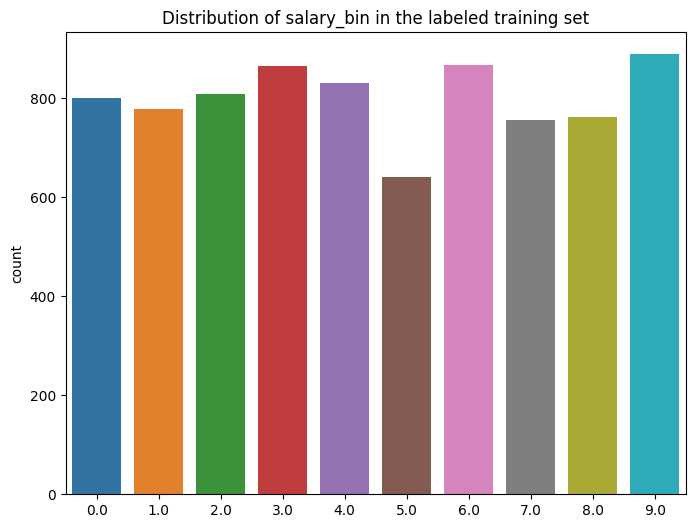

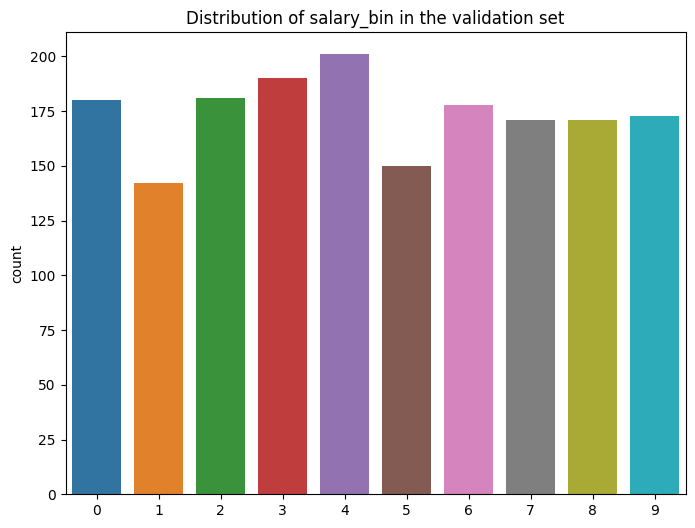

In [9]:
# Plot the distribution of salary_bin in the labeled training set and validation set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_salary_bin)
plt.title('Distribution of salary_bin in the labeled training set')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_valid_salary_bin)
plt.title('Distribution of salary_bin in the validation set')
plt.show()